<img src="https://astanait.edu.kz/wp-content/uploads/2020/05/aitu-logo-2-600x315.png" width="300" height="222" style="  margin-left: auto;
margin-right: auto;">
<br>
<br>  
<center><p style="text-align: center;  font-size: 20px;"> Faculty of Information Technology </p></center>
<center><p style="text-align: center;  font-size: 20px;"> Big Data Analysis </p></center>
    
<br>
<br>   
<br>
<br>


<h1 style="text-align: center"> Report for 4th assignment of the subject </h1>
<h1 style="text-align: center"> “Information Retrieval and Data mining” </h1> 
 
<br>
<br>




<h3 style="text-align: right">Group:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">BDA-2008</h3> 

<h3 style="text-align: right">Prepared by:</h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Bagdat Kuangali,</h3>   
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Alua Onayeva, Assylnur Lesken, </h3>
<p style="text-align: right; font-size: 15px; margin-right: 49px;">Yerkegul Assaiyn, Ayazhan Sydyk</h3>

<h3 style="text-align: right">Instructor:</h3><p style="text-align: right; font-size: 15px; margin-right: 49px;">  Yerzhan Orazayev</p>

<br>
<br>

<p style="text-align: center; font-size: 15px; margin-right: 49px;">Nur-Sultan, 2022</h3>
<br>
<br>
<br>

<h1>Outline</h1>
<h3>
    <a href="#1.-Exploring-the-dataset.-Descriptive-statistic">1. Exploring the dataset. Descriptive statistic </a> <br> <br>
    <a href="#2.-Exploratory-data-analysis.-Exploring-the-features,-visualizations-and-etc.">2. Exploratory data analysis. Exploring the features, visualizations and etc.</a> <br> <br>
    <a href="#3.-Feature-engineering.-Encodings,-generating-the-features-from-date-time,-sum-and-from-other-columns">3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns </a> <br><br>
    <a href="#4.-Unsupervised-learning.-Clustering-analysis.-Segment-the-customers.-K-means,-Hierarchical-Clustering.-With-different-metrics,-linkages.-Visualizing-the-clusters">4. Unsupervised learning. Cluster analysis. Segment the customers. K-means, Hierarchical Clustering. With different metrics, linkages. Visualize the clusters </a> <br><br>
    <a href="#5.-Analyzing-the-results">5. Analyzing the results </a><br><br>
    <a href="#6.-Conclusion">6. Conclusion </a><br>
<h3> 


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


# 1. Exploring the dataset. Descriptive statistic

In [2]:
transactions = pd.read_csv('transactions.csv', sep=';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


#### Description 
**transactions.csv** columns description: 
- client_id - client is id 
- datetime -transaction date (format - ordered day number hh:mm:ss - 421 06:33:15) 
- code - transaction code 
- type - transaction type
- sum - sum of transaction

In [3]:
types = pd.read_csv('types.csv', sep=';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [4]:
codes = pd.read_csv('codes.csv', sep=';')
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [5]:
# merging all three dataframes
transactions = transactions.merge(types, how='left', on='type').copy()
df = transactions.merge(codes, how='left', on='code').copy() 
df.head()

,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


In [6]:
# number of unique clients
print("Number of clients:", df.client_id.nunique())

# number of completed transactions
print("Number of completed transactions:", df.code.nunique())

# shape of df
print('df shape : ', df.shape)

Number of clients: 8656
Number of completed transactions: 175
df shape :  (130039, 7)


**Comment:** There are data about 130.039 transactions that were done in bank with different information such as client id, datetime, sum, gender (target) and others.

### Descriptive statistics has two types: 

- Measures of central tendency (mean, median, mode, quartiles)
- Measures of dispersion (standard deviation, variance, range)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130039 entries, 0 to 130038
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         130039 non-null  int64  
 1   datetime          130039 non-null  object 
 2   code              130039 non-null  int64  
 3   type              130039 non-null  int64  
 4   sum               130039 non-null  float64
 5   type_description  129998 non-null  object 
 6   code_description  130039 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 7.9+ MB


**Comment:** It can be seen that **datetime, type_description, code_description** columns are of a type of object.<br>
The other columns **client_id, code, type, sum** are numerical variables.

In [8]:
df.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


**Comment:** **'describe'** shows us information such as standard deviation, average, and quartiles for numerical variables.

In [9]:
# shapes of our datasets

print('Transactions shape : ', transactions.shape)
print('Types shape : ', types.shape)
print('Codes shape : ', codes.shape)
print('df shape : ', df.shape)

Transactions shape :  (130039, 6)
Types shape :  (155, 2)
Codes shape :  (184, 2)
df shape :  (130039, 7)


In [10]:
# There are a lot of 0 values in our data because one person makes different transactions
income = df[df['sum'] > 0]['sum']
spending = df[df['sum'] < 0]['sum']

print('Average income of clients: ', round(np.mean(income), 2))
print('Average spendings of clients: ', round(np.mean(spending), 2))
print('-' * 50)
print('Mode of income: ', income.mode())
print('Mode of spendings: ', spending.mode())
print('-' * 50)
print('Median of income: ', round(np.median(income), 2))
print('Median of spending: ', round(np.median(spending), 2))
print('-' * 50)
print('Standard deviation of income of clients: ', round(np.std(income), 2))
print('Standard deviation of spendings of clients: ', round(np.std(spending), 2))

Average income of clients:  172174.28
Average spendings of clients:  -61887.28
--------------------------------------------------
Mode of income:  0    22459.16
dtype: float64
Mode of spendings:  0   -2245.92
dtype: float64
--------------------------------------------------
Median of income:  22459.16
Median of spending:  -8983.66
--------------------------------------------------
Standard deviation of income of clients:  1081321.27
Standard deviation of spendings of clients:  323212.79


# 2. Exploratory data analysis. Exploring the features, visualizations and etc.

In [11]:
# top 10 values by frequency in code_description column
size = df.code_description.value_counts().sort_values(ascending=False).head(10) 
label = df.code_description.value_counts().index

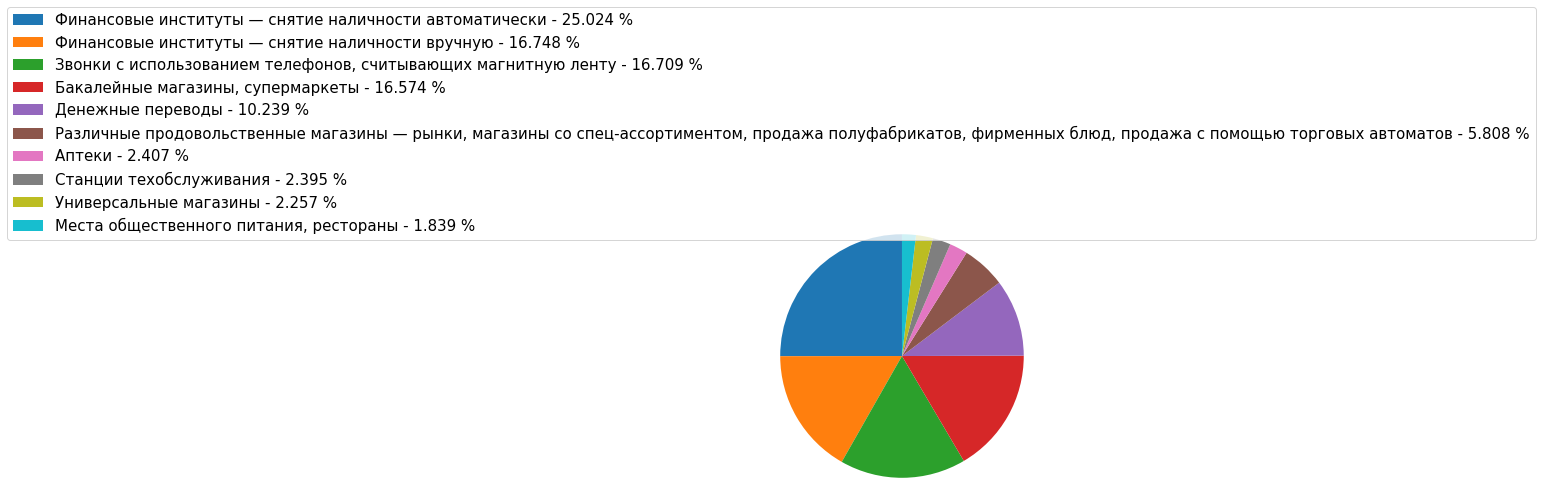

In [12]:
x = np.array(label)
y = np.array(size)
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=90, radius=1.4)
labels = ['{0} - {1:1.3f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y), key=lambda x: x[2], reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.), fontsize=15);

**Comment:** As we can see from the graph above, these are top 10 code descriptions that prevail in our dataset. <br>

Quarter of them fall on 'Финансовые институты — снятие наличности автоматически'. 

In [13]:
# total orders of clients
total_orders = df.groupby(['client_id'])['datetime'].count()
total_orders = pd.DataFrame(total_orders)
total_orders.columns = ['total_orders']

# total sum of earnings and spendings 
total_spending=df.groupby(['client_id'])['sum'].sum()
total_spending = pd.DataFrame(total_spending)
total_spending.columns = ['total']

# new dataset
new = df.client_id
new = pd.DataFrame(new)
new = new.merge(total_orders,on='client_id', how='left')
new = new.merge(total_spending,on='client_id', how='left')
new.head()

,client_id,total_orders,total
0,96372458,13,-1102812.03
1,24567813,14,-488237.85
2,21717441,15,-3135792.54
3,14331004,23,-5893527.32
4,85302434,8,-101501.02


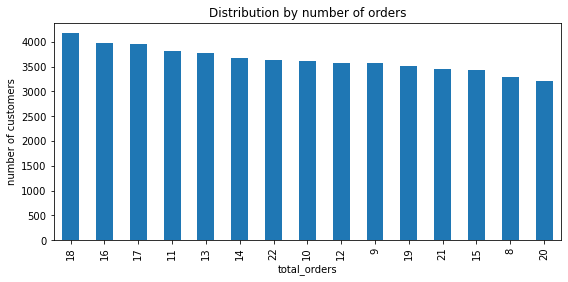

In [14]:
plt.figure(figsize=(20,4))
plt.subplot(121)
new['total_orders'].value_counts().sort_values(ascending=False).head(15).plot(kind="bar")
plt.xlabel('total_orders')
plt.ylabel("number of customers")
plt.title('Distribution by number of orders');

**Comment:** This graph illustrates the total number orders' frequency. As it can be seen from the bar graph the most frequent number of orders are 18, 16, 17 with in sum more than 11000 people.

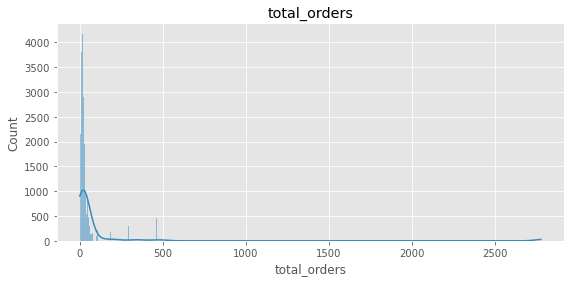

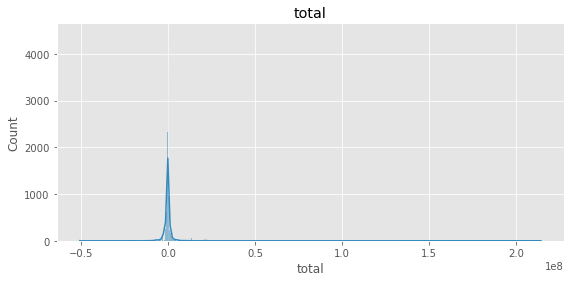

In [15]:
plt.style.use("ggplot")

# iterate through columns
for column in ["total_orders", "total"]: 
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.histplot(new[column], kde=True)
    plt.title(column)

**Comment:** Our 'sum' column has both negative and positive values. The second graph depicts us that in general the sum of spendings and earning 'compensate' each other, and at the end most people's sum will be near zero.

In [16]:
# creating Day column out of 'datetime' column
new['Day'] = df['datetime'].apply(lambda s : int(s.split(' ')[0]))
new['type_description']=df['type_description']
new.head()

,client_id,total_orders,total,Day,type_description
0,96372458,13,-1102812.03,421,Выдача наличных в АТМ
1,24567813,14,-488237.85,377,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,15,-3135792.54,55,Выдача наличных в АТМ
3,14331004,23,-5893527.32,263,Выдача наличных в АТМ
4,85302434,8,-101501.02,151,Оплата услуги. Банкоматы


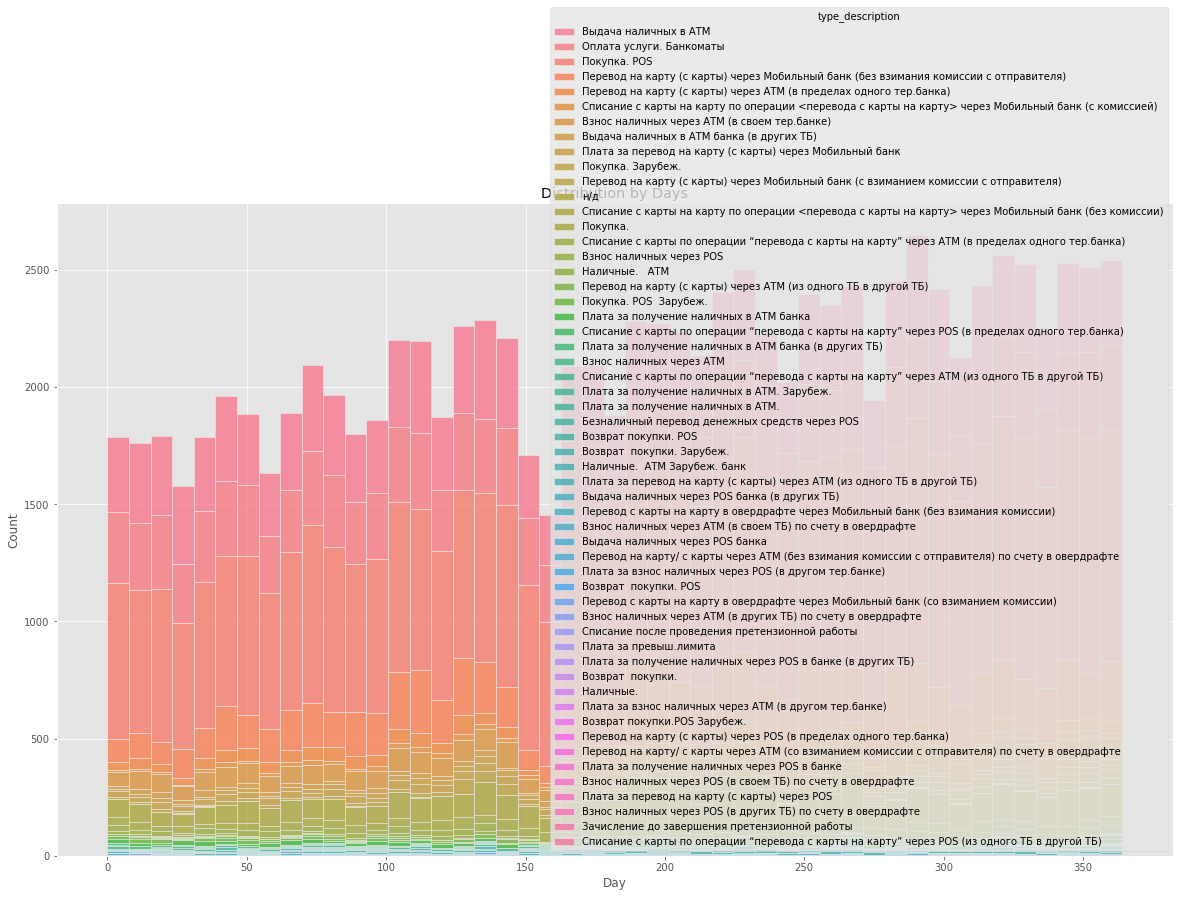

In [17]:
fig, ((ax1)) = plt.subplots(1,1, figsize=(20,12))

sns.histplot(data=new[new['Day']<365], 
             x="Day", 
             hue="type_description", 
             multiple="stack",
             ax=ax1)

ax1.set_title('Distribution by Days')

plt.show()

**Comment:** Here we took as X-axis number of Days less than 365, which is about one year. Our dataset has around 430 days in it. <br>
Graph illustreates the distribution of type description of purchases by days.

# Descriptive statistics

In [18]:
transactions = pd.read_csv('transactions.csv', sep=';')
transactions.head()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87


In [19]:
types = pd.read_csv('types.csv', sep=';')
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [20]:
codes = pd.read_csv('codes.csv', sep=';')
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [21]:
transactions = transactions.merge(types, how='left', on='type').copy()
df = transactions.merge(codes, how='left', on='code').copy() 
df.head()

,client_id,datetime,code,type,sum,type_description,code_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
1,24567813,377 17:20:40,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...
2,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
3,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...
4,85302434,151 10:34:12,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих..."


# 3. Feature engineering. Encodings, generating the features from date-time, sum and from other columns

In [22]:
# Create new column for spending and earning
# 0: Spending 
# 1: Earning
df['sum>0'] = transactions['sum'].apply(lambda x : int(x>0))
df.head()

,client_id,datetime,code,type,sum,type_description,code_description,sum>0
0,96372458,421 06:33:15,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0
1,24567813,377 17:20:40,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,1
2,21717441,55 13:38:47,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0
3,14331004,263 12:57:08,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0
4,85302434,151 10:34:12,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",0


In [23]:
# Create new column for day number
df['day'] = df['datetime'].apply(lambda s : int(s.split(' ')[0]))

# Create new column for time
df['time'] = df['datetime'].apply(lambda s : s.split(' ')[1])

# drop the column datetime
del df['datetime']
df.head()

,client_id,code,type,sum,type_description,code_description,sum>0,day,time
0,96372458,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,421,06:33:15
1,24567813,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,1,377,17:20:40
2,21717441,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,55,13:38:47
3,14331004,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,263,12:57:08
4,85302434,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",0,151,10:34:12


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130039 entries, 0 to 130038
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         130039 non-null  int64  
 1   code              130039 non-null  int64  
 2   type              130039 non-null  int64  
 3   sum               130039 non-null  float64
 4   type_description  129998 non-null  object 
 5   code_description  130039 non-null  object 
 6   sum>0             130039 non-null  int64  
 7   day               130039 non-null  int64  
 8   time              130039 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 9.9+ MB


**Comment:** So we have created new 'sum>0' column in order to indicate record with positive and negative sums.<br> 1 stands for positive values, otherwise negative ones.

We have deleted 'datetime' column, and instead of them decided to create two separate columns named 'day' and 'time'. 'day' is a type of integer, and 'time' is a type of object.

In [25]:
from datetime import datetime, date, timedelta

def find_date(day_num):
    '''
    Returns the date according to day number
    Start date: 1 January, 2020 (153 day).  
    '''
    strt_date = date(2020, 1, 1)
    day_num = day_num - 153
    res_date = strt_date + timedelta(days=day_num)
    
    res = res_date.strftime("%d-%m-%Y")
    
    return res

In [26]:
df['date'] = df['day'].apply(lambda x : find_date(x))
df.head()

,client_id,code,type,sum,type_description,code_description,sum>0,day,time,date
0,96372458,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,421,06:33:15,25-09-2020
1,24567813,6011,7010,67377.47,Взнос наличных через АТМ (в своем тер.банке),Финансовые институты — снятие наличности автом...,1,377,17:20:40,12-08-2020
2,21717441,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,55,13:38:47,25-09-2019
3,14331004,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,0,263,12:57:08,20-04-2020
4,85302434,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",0,151,10:34:12,30-12-2019


In [27]:
# Recreate the datetime column with datetime64 datatype.
df['datetime'] = df['date'] + ' ' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M:%S')

# Remove unwanted columns
del df['date'], df['day'], df['time']

# leave only spendings in the dataset
df = df.drop(df[df["sum>0"] == 1].index)
del df['sum>0']

df.head()

,client_id,code,type,sum,type_description,code_description,datetime
0,96372458,6011,2010,-561478.94,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-09-25 06:33:15
2,21717441,6011,2010,-44918.32,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2019-09-25 13:38:47
3,14331004,6011,2010,-3368873.66,Выдача наличных в АТМ,Финансовые институты — снятие наличности автом...,2020-04-20 12:57:08
4,85302434,4814,1030,-3368.87,Оплата услуги. Банкоматы,"Звонки с использованием телефонов, считывающих...",2019-12-30 10:34:12
5,31421357,5411,1110,-1572.14,Покупка. POS,"Бакалейные магазины, супермаркеты",2020-09-02 00:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105728 entries, 0 to 130038
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   client_id         105728 non-null  int64         
 1   code              105728 non-null  int64         
 2   type              105728 non-null  int64         
 3   sum               105728 non-null  float64       
 4   type_description  105687 non-null  object        
 5   code_description  105728 non-null  object        
 6   datetime          105728 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 6.5+ MB


**Comment:** We created a function that based on day number separated it into date. We took January 1, 2020 as starting date for that. <br> And later on recreated 'datetime' column from 'day' and 'time' columns with a type of datetime64. Moreover, we decided to drop all earnings('sum>0'==1) and leave only spendings('sum>0'==0).

### RFM Analysis
##### Recency, frequency, monetary value (RFM) is a marketing analysis tool used to identify a firm's best clients based on the nature of their spending habits.

 Recency -  the interval between the last action and last day in dataframe (max_date)<br>
 Frequency - is the total number of transactions. <br>
 Monetary value  - sum, total amount has spent.


In [29]:
# Recency

# Calculate difference between last day and date
df['diff'] = max(df['datetime']) - df['datetime']
rfm_r = df.groupby('client_id', as_index=False)['diff'].min()

# Extract number of days only
rfm_r['diff'] = rfm_r['diff'].dt.days
rfm_r.head()

,client_id,diff
0,22899,15
1,27914,195
2,28753,23
3,31385,142
4,38084,27


In [30]:
# Frequency
rfm_f = df.groupby('client_id', as_index=False)['sum'].count()
rfm_f.columns = ['client_id', 'frequency']
rfm_f.head()

,client_id,frequency
0,22899,6
1,27914,2
2,28753,12
3,31385,11
4,38084,20


In [31]:
# Monetary
rfm_m = df.groupby('client_id', as_index=False)['sum'].sum()
rfm_m.head()

,client_id,sum
0,22899,-34497.27
1,27914,-4491.84
2,28753,-3263575.02
3,31385,-121705.95
4,38084,-1058318.65


In [32]:
# Store RFM values in one dataframe
rfm = pd.DataFrame()
rfm['recency'] = rfm_r['diff']
rfm['frequency'] = rfm_f['frequency']
rfm['sum'] = rfm_m['sum']
rfm.head()

,recency,frequency,sum
0,15,6,-34497.27
1,195,2,-4491.84
2,23,12,-3263575.02
3,142,11,-121705.95
4,27,20,-1058318.65


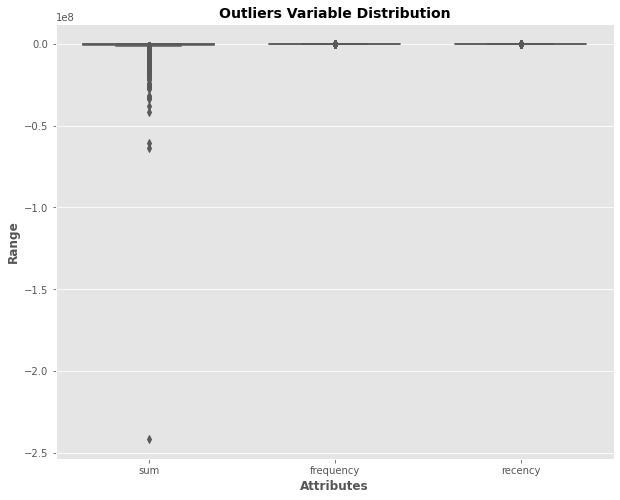

In [33]:
# Plot Boxplot of Outliers Variable Distribution
attributes = ['sum','frequency','recency']
plt.rcParams['figure.figsize'] = [10,8]

sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

plt.show()

**Comment:** This graph depicts us an illustration of outliers in our sum, frequency, recency attributes.

In [34]:
# Removing (statistical) outliers for Amount
Q1 = rfm['sum'].quantile(0.25)
Q3 = rfm['sum'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['sum'] >= Q1 - 1.5*IQR) & (rfm['sum'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm['recency'].quantile(0.25)
Q3 = rfm['recency'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['recency'] >= Q1 - 1.5*IQR) & (rfm['recency'] <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm['frequency'].quantile(0.25)
Q3 = rfm['frequency'].quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm['frequency'] >= Q1 - 1.5*IQR) & (rfm['frequency'] <= Q3 + 1.5*IQR)]

In [35]:
# Instantiate
scaler = StandardScaler()

# Fit to data, then transform it.
rfm_scaled = scaler.fit_transform(rfm)
rfm_scaled.shape

(6832, 3)

**Comment:** We used Scaling of our variables. StandardScaler() was used to normalize our variables.

In [36]:
# Create the dataframe for transformed data
rfm_df_scaled = pd.DataFrame(rfm_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.656836,-0.657960,0.941339
1,2.277261,0.027971,0.672662
2,-0.379599,1.262647,-2.212904
3,-0.887868,2.908882,-1.137262
4,-0.610630,1.125461,-3.294426


**Comment:** The table above shows the numbers for our attributes.

# 4. Unsupervised learning. Clustering analysis. Segment the customers. K-means, Hierarchical Clustering. With different metrics, linkages. Visualizing the clusters

### Defining our accuracy metric
Silhouette

This coefficient does not imply the knowledge about the true labels of the objects. It lets us estimate the quality of the clustering using only the initial, unlabeled sample and the clustering result. To start with, for each observation, the silhouette coefficient is computed. Let  𝑎  be the mean of the distance between an object and other objects within one cluster and  𝑏  be the mean distance from an object to an object from the nearest cluster (different from the one the object belongs to). Then the silhouette measure for this object is

$$ S=\dfrac{b-a}{max(a, b)} $$

 
The silhouette of a sample is a mean value of silhouette values from this sample. Therefore, the silhouette distance shows to which extent the distance between the objects of the same class differ from the mean distance between the objects from different clusters. This coefficient takes values in the  [−1,1]  range. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette value is, the better the results from clustering.

With the help of silhouette, we can identify the optimal number of clusters  𝑘  (if we don't know it already from the data) by taking the number of clusters that maximizes the silhouette coefficient.

### k-means

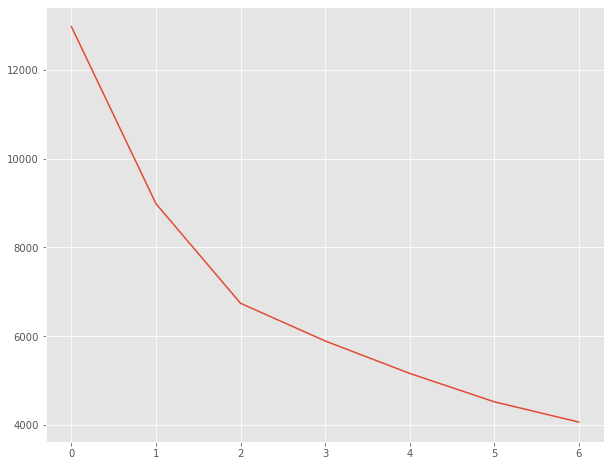

In [37]:
sse = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    k_means = KMeans(n_clusters=num_clusters, max_iter=50)
    k_means.fit(rfm_df_scaled)
    
    sse.append(k_means.inertia_)
    
# plot the SSE's for each n_clusters
plt.plot(sse)

plt.show()

**Comment:** From elbow method we see that most appropriate number of clusters is 2.

In [39]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    k_means = KMeans(n_clusters=num_clusters, max_iter=50)
    k_means.fit(rfm_df_scaled)
    
    cluster_labels = k_means.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.3422141987380478
For n_clusters=3, the silhouette score is 0.3562734286711124
For n_clusters=4, the silhouette score is 0.36284718895007223
For n_clusters=5, the silhouette score is 0.35998853852089574
For n_clusters=6, the silhouette score is 0.3130964699116777
For n_clusters=7, the silhouette score is 0.29522532360744125
For n_clusters=8, the silhouette score is 0.3034231474917611


**Comment:** But from silhouette score we see that k=4 gives better performance.

  So, we decided to choose somewhere in between from this values.

In [61]:
# Final model with k=3

k_means = KMeans(n_clusters=3, max_iter=50)
k_means.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [62]:
rfm['Cluster_Id'] = k_means.labels_
rfm.head()

,recency,frequency,sum,Cluster_Id,Cluster_Labels
0,15,6,-34497.27,2,0
3,142,11,-121705.95,0,0
4,27,20,-1058318.65,1,0
5,5,32,-709180.92,1,0
6,17,19,-1409364.96,1,0


### Hierarchial clustering

In [42]:
def calculate_score(affinity, linkage):
    
    print("Affinity type:", affinity)
    print("Linkage type:", linkage)
    range_n_clusters = [2, 3, 4, 5, 6]
    for num_clusters in range_n_clusters:
    
        # intialise AgglomerativeClustering
        clusterer = AgglomerativeClustering(n_clusters=num_clusters, affinity=affinity, linkage=linkage)
        cluster_labels = clusterer.fit_predict(rfm_df_scaled)

        # silhouette score
        silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

In [43]:
print(calculate_score('cosine', 'single'));
print(calculate_score('cosine', 'average'));
print(calculate_score('cosine', 'complete'));

Affinity type: cosine
Linkage type: single
For n_clusters=2, the silhouette score is 0.24701376968089947
For n_clusters=3, the silhouette score is -0.13262266472951803
For n_clusters=4, the silhouette score is -0.16215798053648994
For n_clusters=5, the silhouette score is -0.16213153510889794
For n_clusters=6, the silhouette score is -0.33588512454098746
None
Affinity type: cosine
Linkage type: average
For n_clusters=2, the silhouette score is 0.3189045968748493
For n_clusters=3, the silhouette score is 0.27388342640200486
For n_clusters=4, the silhouette score is 0.280573416967253
For n_clusters=5, the silhouette score is 0.2928710943935547
For n_clusters=6, the silhouette score is 0.27466254730158307
None
Affinity type: cosine
Linkage type: complete
For n_clusters=2, the silhouette score is 0.27726998132561687
For n_clusters=3, the silhouette score is 0.27748523055549723
For n_clusters=4, the silhouette score is 0.23633769378958805
For n_clusters=5, the silhouette score is 0.24725448

In [44]:
print(calculate_score('euclidean', 'single'))
print(calculate_score('euclidean', 'average'))
print(calculate_score('euclidean', 'complete'))
print(calculate_score('euclidean', 'ward'))

Affinity type: euclidean
Linkage type: single
For n_clusters=2, the silhouette score is 0.4008392049677361
For n_clusters=3, the silhouette score is 0.3999348924688657
For n_clusters=4, the silhouette score is 0.21791707778108502
For n_clusters=5, the silhouette score is 0.2087329092261035
For n_clusters=6, the silhouette score is 0.2041894781249531
None
Affinity type: euclidean
Linkage type: average
For n_clusters=2, the silhouette score is 0.40571952022784685
For n_clusters=3, the silhouette score is 0.3198176504115518
For n_clusters=4, the silhouette score is 0.2819458826686781
For n_clusters=5, the silhouette score is 0.2663008046538184
For n_clusters=6, the silhouette score is 0.24666679934587937
None
Affinity type: euclidean
Linkage type: complete
For n_clusters=2, the silhouette score is 0.2999698638948875
For n_clusters=3, the silhouette score is 0.2706680635089857
For n_clusters=4, the silhouette score is 0.24019204350401815
For n_clusters=5, the silhouette score is 0.26965914

In [45]:
print(calculate_score('manhattan', 'single'))
print(calculate_score('manhattan', 'average'))
print(calculate_score('manhattan', 'complete'))

Affinity type: manhattan
Linkage type: single
For n_clusters=2, the silhouette score is 0.4008392049677361
For n_clusters=3, the silhouette score is 0.3190839787943653
For n_clusters=4, the silhouette score is 0.2084744956162083
For n_clusters=5, the silhouette score is 0.2087329092261035
For n_clusters=6, the silhouette score is 0.20949576288154734
None
Affinity type: manhattan
Linkage type: average
For n_clusters=2, the silhouette score is 0.44544868735785886
For n_clusters=3, the silhouette score is 0.3436215563945309
For n_clusters=4, the silhouette score is 0.3068147395915554
For n_clusters=5, the silhouette score is 0.24648901456730574
For n_clusters=6, the silhouette score is 0.23370665938036483
None
Affinity type: manhattan
Linkage type: complete
For n_clusters=2, the silhouette score is 0.33040098440211463
For n_clusters=3, the silhouette score is 0.257783055835101
For n_clusters=4, the silhouette score is 0.3044434398650604
For n_clusters=5, the silhouette score is 0.27252932

**Comment:** It seems like **euclidean** affinity and **single** linkage gives the highest score for n_clusters equal to the **3** among other affinities and linkages.

In [46]:
X = linkage(rfm_df_scaled, method='single', metric='euclidean')

In [47]:
cluster_labels = cut_tree(X, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,recency,frequency,sum,Cluster_Id,Cluster_Labels
0,15,6,-34497.27,0,0
3,142,11,-121705.95,2,0
4,27,20,-1058318.65,1,0
5,5,32,-709180.92,1,0
6,17,19,-1409364.96,1,0


#### Visualization of clusters k-means clustering

In [63]:
import plotly.graph_objects as go

PLOT = go.Figure()

for C in list(rfm.Cluster_Id.unique()):
    
    PLOT.add_trace(go.Scatter3d(x = rfm[rfm.Cluster_Id == C]['recency'],
                                y = rfm[rfm.Cluster_Id == C]['frequency'],
                                z = rfm[rfm.Cluster_Id == C]['sum'],
                                mode = 'markers', marker_size = 8, marker_line_width = 1,
                                name = 'Cluster_Id ' + str(C)))


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'recency', titlefont_color = 'black'),
                                yaxis=dict(title = 'frequency', titlefont_color = 'black'),
                                zaxis=dict(title = 'Monetary value', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

**Comment:** So using RFM segmentation we have divided our clients into 3 category. 

So the first is the green ones(Cluster Id 1). They describe the customers whose frequency is large and recency is insignificant. In other words, our regular clients.

The blue(Cluster Id 2) category is considered to be new clients that spend little amount of money in compare to other ones.

The red(Cluster Id 0) category of clients are those who earlier were our clients(older clients).

#### Visualization of clusters from Hierarchical clustering

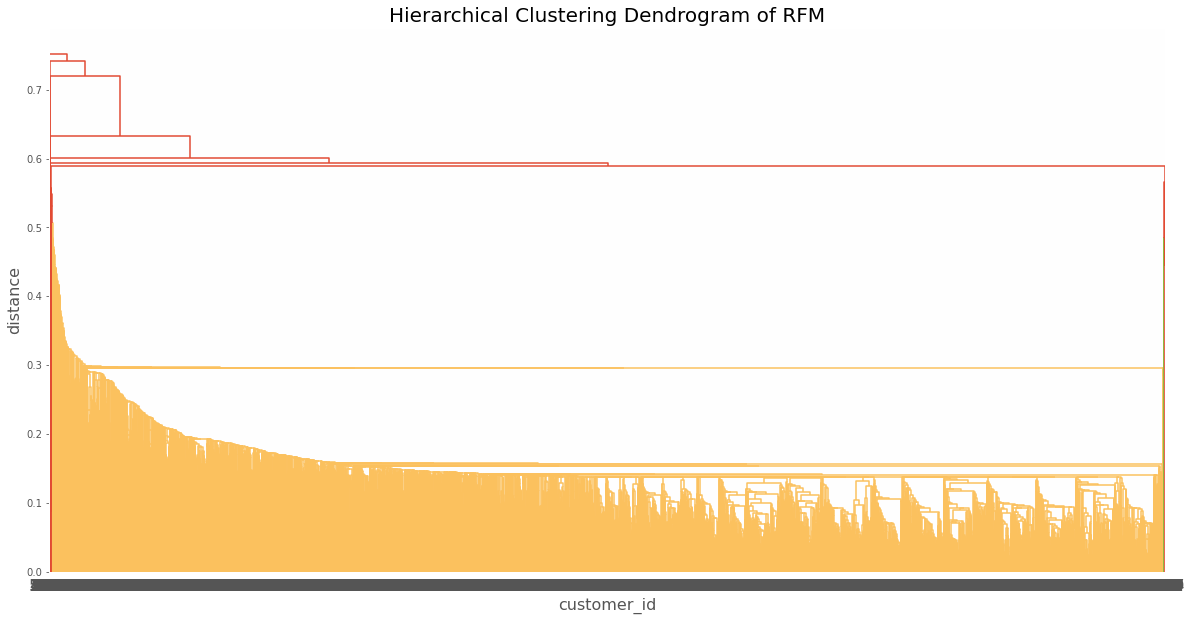

In [50]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram of RFM', size=20)
plt.xlabel('customer_id', size=16)
plt.ylabel('distance', size=16)

dendrogram(
    X,
    p=5,
    leaf_rotation=0,
    leaf_font_size=16,
)

plt.show()

# 5. Analyzing the results

### Results from k-means

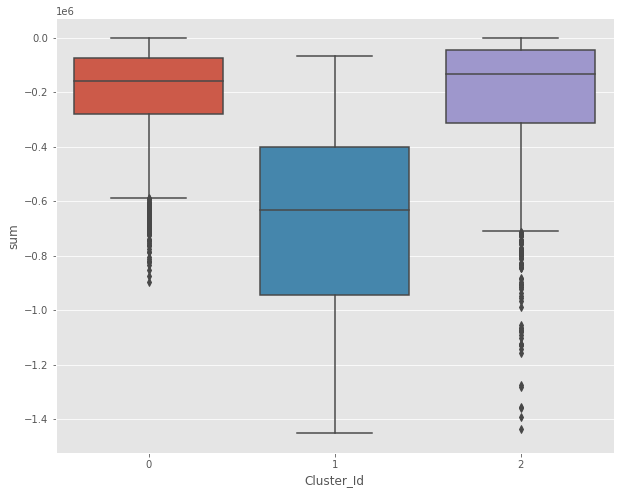

In [51]:
#boxplot of cluster_id vs sum

sns.boxplot(x='Cluster_Id', y='sum', data=rfm);

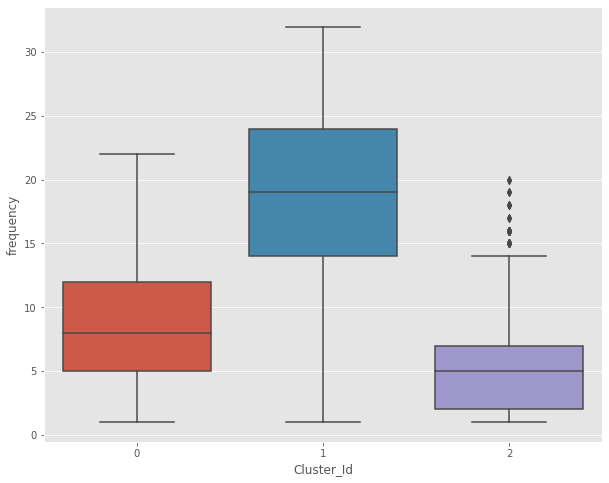

In [52]:
#boxplot of cluster_id vs frequency

sns.boxplot(x='Cluster_Id', y='frequency', data=rfm);

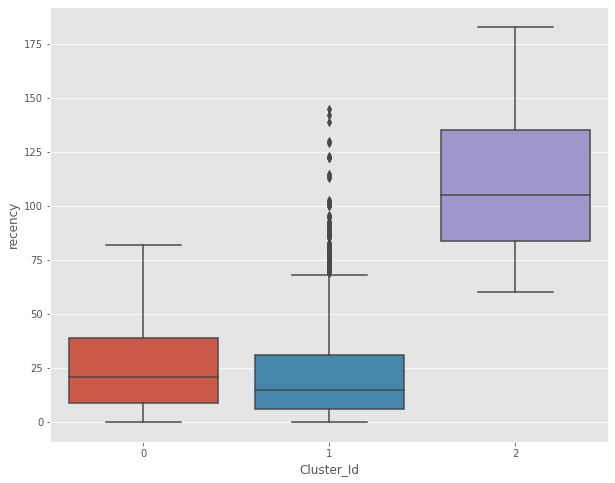

In [53]:
#boxplot of cluster_id vs recency

sns.boxplot(x='Cluster_Id', y='recency', data=rfm);

### Results from Agglomerative Clustering

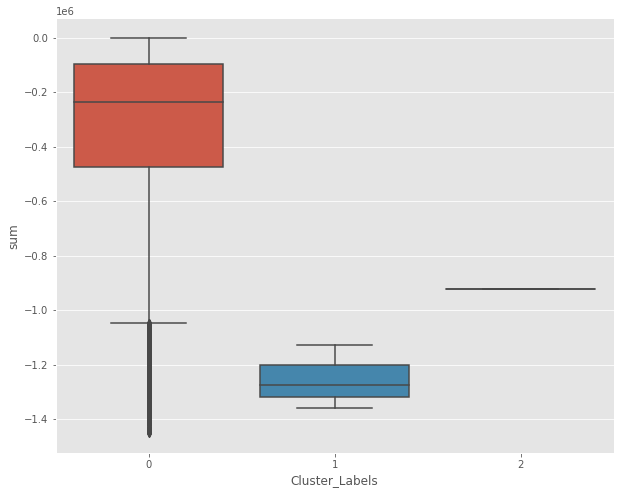

In [54]:
#boxplot of cluster_labels vs sum

sns.boxplot(x='Cluster_Labels', y='sum', data=rfm);

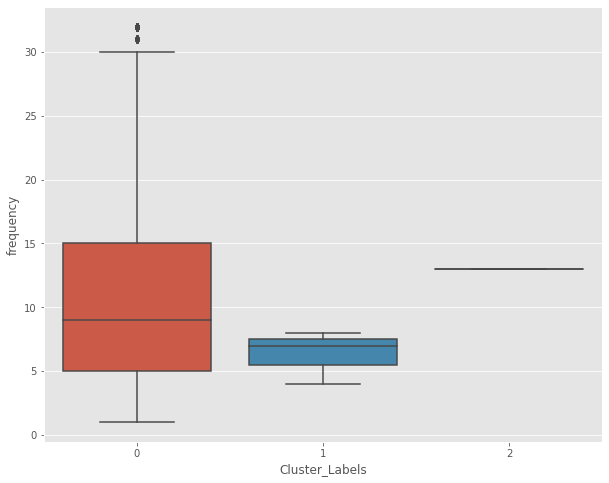

In [55]:
#boxplot of cluster_labels vs frequency

sns.boxplot(x='Cluster_Labels', y='frequency', data=rfm);

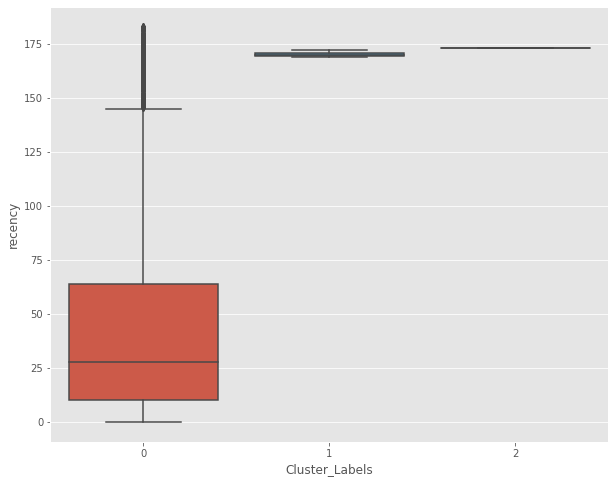

In [56]:
#boxplot of cluster_labels vs recency

sns.boxplot(x='Cluster_Labels', y='recency', data=rfm);

# 6. Conclusion


In the descriptive statistics part we have merged 3 dataframes (Transaction, codes, types), then have used several methods to explore and get information about transactions in bank account such as number of clients and transactions.

In addition we have defined measures of central tendency and dispersion of income and spending money.  Next, we did explanatory data analysis through visualizations of the features, and created new features to use for unsupervised learning further. In feature engineering part the RFM principle was used.


Inferences from our data:

K-Means Clustering with 3 Cluster Ids

- Customers with Cluster Id 0 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 1 are frequent buyers.
- Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

Hierarchical Clustering with 3 Cluster Labels

- Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster_Labels 1 are frequent buyers.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

As a result, we were able to segment the clients into 3 different clusters based on different methodologies.
